In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_excel("data_health.xlsx")

In [3]:
data.head()

,Carimbo de data/hora,Como você se identifica?,Em que estado você vive?,Em que região do estado você vive?,"Caso se sinta confortável, deixe seu número de telefone, caso tenhamos dúvidas sobre suas respostas.",Qual sistema de saúde você utiliza?,Com que frequência você vai ao médico?,Você já enfrentou dificuldades para agendar uma consulta com um especialista médico na sua região?,"Caso sim, conte mais",Quanto tempo você normalmente espera para conseguir uma consulta com um especialista?,"Caso você encontre dificuldade em encontrar consultas e/ou especialistas, o que você acredita ser um empecilho? Caso queira, pode marcar mais de um",Você acha que a falta de acesso a especialistas médicos afetou sua saúde ou a saúde de sua família?,"Se sim, como?"
0,2024-08-19 19:39:48.287,Mulher,São Paulo,Capital,NaN,Privado,Vou apenas em caso de necessidade,Sim,Demora para marcar a consulta devido a alta de...,1 - 3 meses,Tempo,Não tenho certeza,NaN
1,2024-08-19 19:42:21.607,Homem,São Paulo,Capital,NaN,Privado,1x por ano,Não,NaN,Menos de 1 mês,NaN,Não,NaN
2,2024-08-19 19:42:48.970,Homem,São Paulo,Capital,NaN,Público,mais de 3x por ano,Sim,NaN,1 - 3 meses,"Tempo, Financeiro","Sim, muito",NaN
3,2024-08-19 19:43:28.730,Mulher,São Paulo,Capital,NaN,Ambos,mais de 3x por ano,Não,NaN,1 - 3 meses,NaN,Não,NaN
4,2024-08-19 20:00:03.365,Homem,São Paulo,Capital,NaN,Público,Vou apenas em caso de necessidade,Não,NaN,Não costumo ir ao médico,"Tempo, Distância, Financeiro, Não saber onde p...","Sim, um pouco",A região em que morava varias vezes se encont...


## Analisando

In [6]:
data["Qual sistema de saúde você utiliza?"].value_counts()

Qual sistema de saúde você utiliza?
Privado    51
Público    14
Ambos      14
Name: count, dtype: int64

<Axes: ylabel='count'>

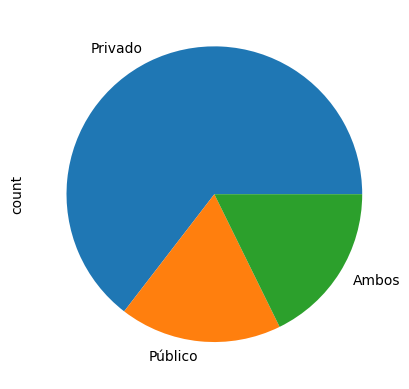

In [25]:
#plotando o gráfico
data["Qual sistema de saúde você utiliza?"].value_counts().plot(kind='pie')

In [7]:
data["Com que frequência você vai ao médico?"].value_counts()

Com que frequência você vai ao médico?
mais de 3x por ano                   30
Vou apenas em caso de necessidade    27
2x por ano                           10
1x por ano                            9
Não costumo ir ao médico              3
Name: count, dtype: int64

<Axes: ylabel='count'>

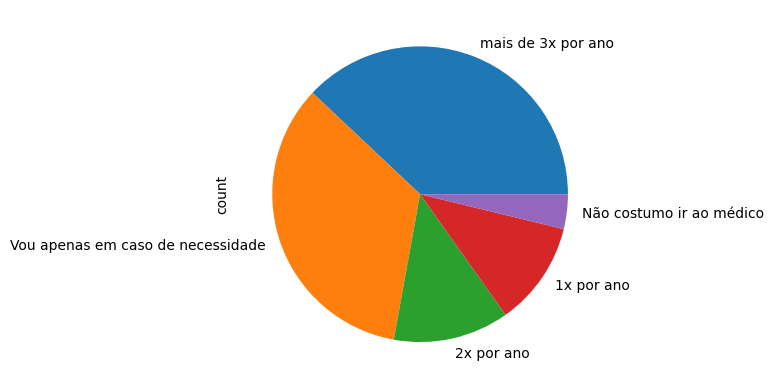

In [24]:
data["Com que frequência você vai ao médico?"].value_counts().plot(kind='pie')

In [8]:
data["Você já enfrentou dificuldades para agendar uma consulta com um especialista médico na sua região?"].value_counts()

Você já enfrentou dificuldades para agendar uma consulta com um especialista médico na sua região?
Não    42
Sim    37
Name: count, dtype: int64

<Axes: ylabel='count'>

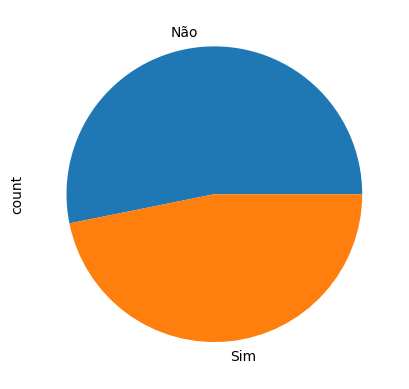

In [23]:
data["Você já enfrentou dificuldades para agendar uma consulta com um especialista médico na sua região?"].value_counts().plot(kind='pie')

In [9]:
data["Quanto tempo você normalmente espera para conseguir uma consulta com um especialista?"].value_counts()

Quanto tempo você normalmente espera para conseguir uma consulta com um especialista?
Menos de 1 mês              36
1 - 3 meses                 30
Não costumo ir ao médico     8
3 - 6 meses                  5
Name: count, dtype: int64

<Axes: ylabel='count'>

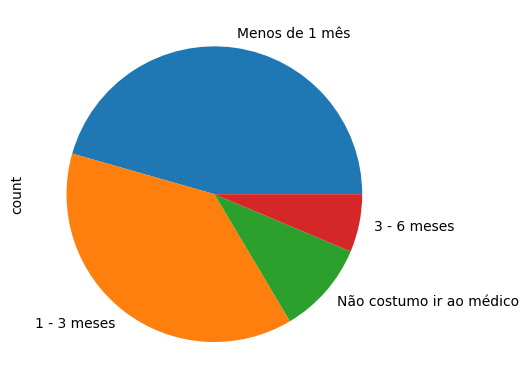

In [22]:
data["Quanto tempo você normalmente espera para conseguir uma consulta com um especialista?"].value_counts().plot(kind='pie')

In [10]:
data["Caso você encontre dificuldade em encontrar consultas e/ou especialistas, o que você acredita ser um empecilho? Caso queira, pode marcar mais de um"].value_counts()

Caso você encontre dificuldade em encontrar consultas e/ou especialistas, o que você acredita ser um empecilho? Caso queira, pode marcar mais de um
Tempo, Falta de disponibilidade de profissionais                                                    9
Falta de disponibilidade de profissionais                                                           8
Tempo                                                                                               5
Não saber onde procurar                                                                             4
Financeiro                                                                                          4
Tempo, Distância                                                                                    4
Tempo, Falta de disponibilidade de profissionais, Financeiro                                        3
Falta de disponibilidade de profissionais, Financeiro                                               3
Tempo, Distância, Financeiro        

In [12]:
data["Você acha que a falta de acesso a especialistas médicos afetou sua saúde ou a saúde de sua família?"].value_counts()

Você acha que a falta de acesso a especialistas médicos afetou sua saúde ou a saúde de sua família?
Não                  36
Sim, um pouco        23
Não tenho certeza    16
Sim, muito            4
Name: count, dtype: int64

<Axes: ylabel='count'>

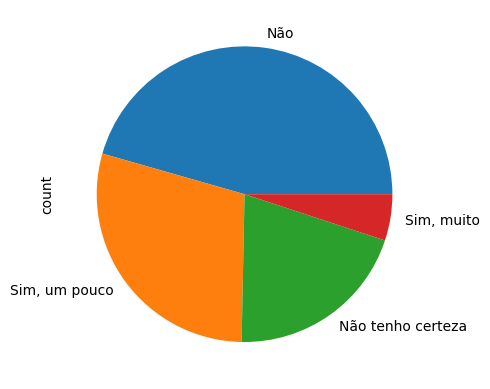

In [21]:
data["Você acha que a falta de acesso a especialistas médicos afetou sua saúde ou a saúde de sua família?"].value_counts().plot(kind='pie')

### Tentando encontrar semelhanças

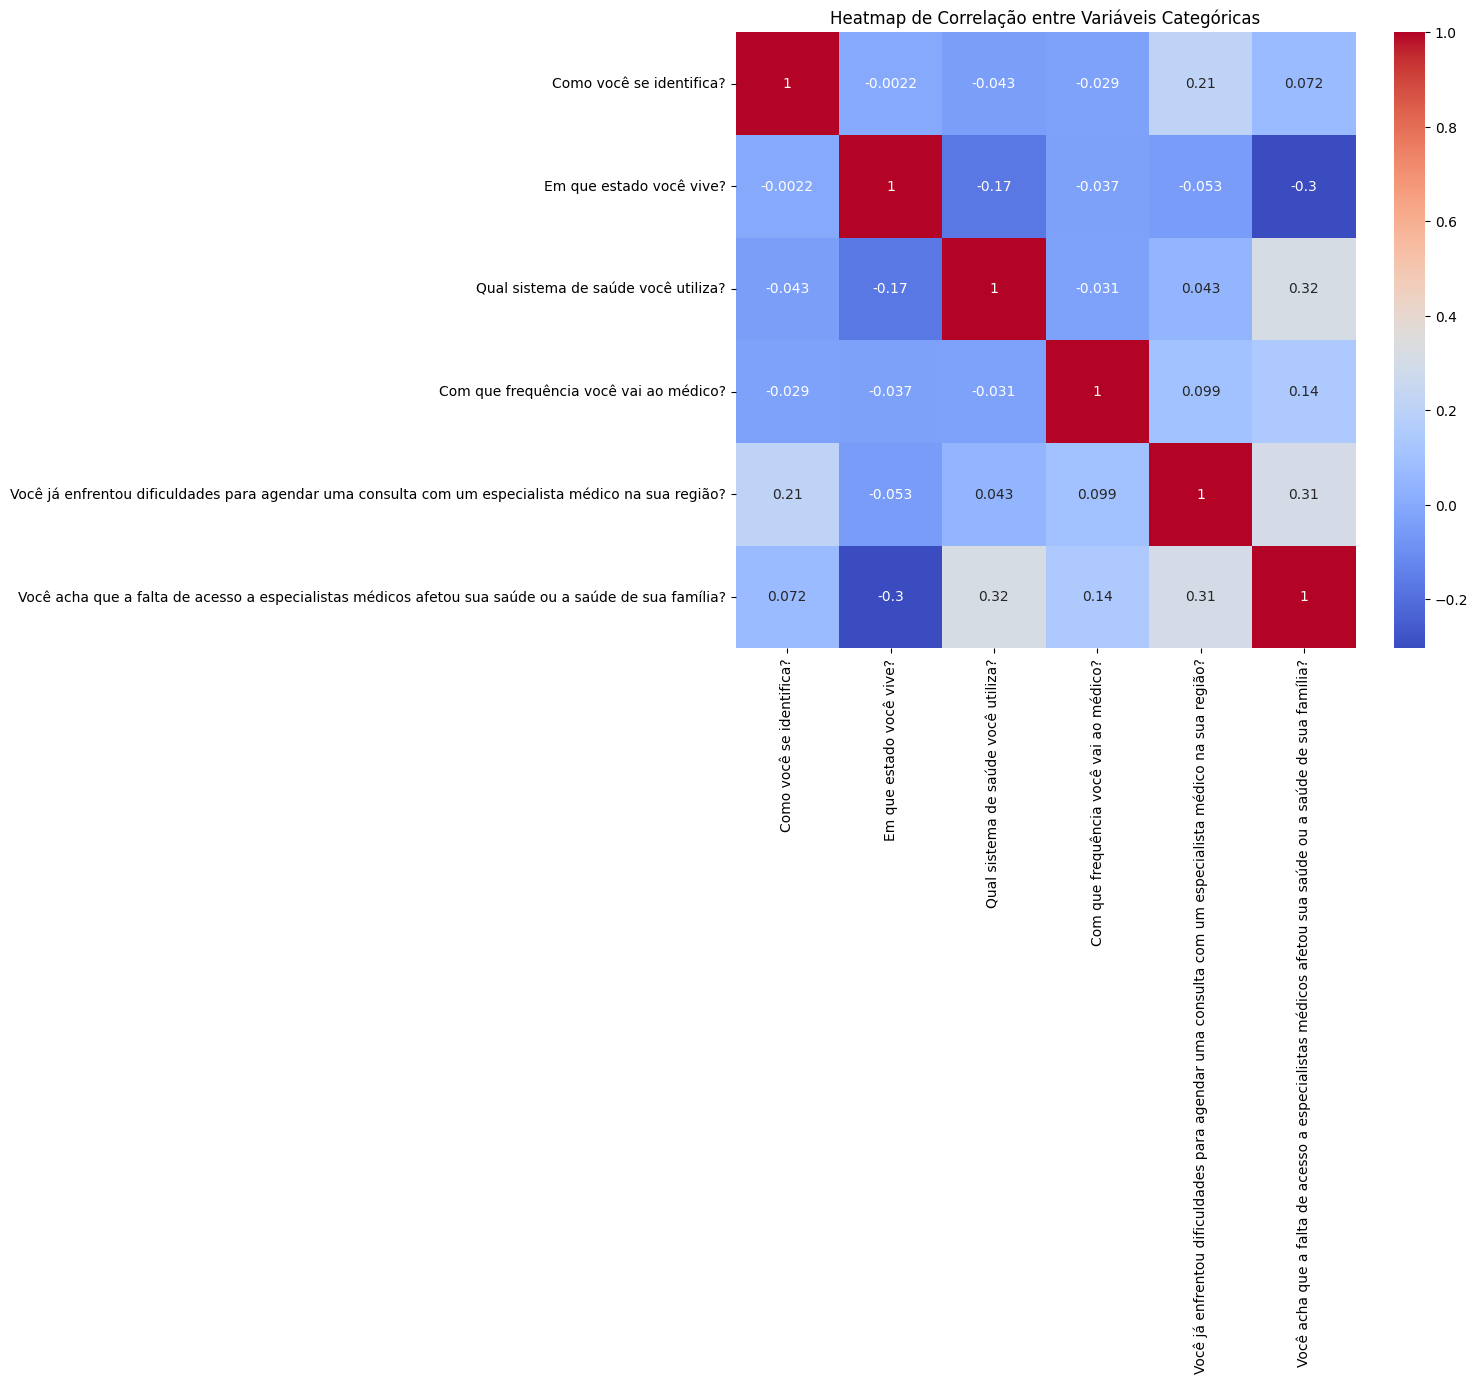

In [28]:

cols_of_interest = [
    "Como você se identifica?",
    "Em que estado você vive?",
    "Qual sistema de saúde você utiliza?",
    "Com que frequência você vai ao médico?",
    "Você já enfrentou dificuldades para agendar uma consulta com um especialista médico na sua região?",
    "Você acha que a falta de acesso a especialistas médicos afetou sua saúde ou a saúde de sua família?"
]


df_filtered = data[cols_of_interest]

label_encoders = {col: LabelEncoder() for col in cols_of_interest}
df_encoded = df_filtered.apply(lambda col: label_encoders[col.name].fit_transform(col))

correlation_matrix = df_encoded.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Heatmap de Correlação entre Variáveis Categóricas')
plt.show()


#### Analisando a correlação da dificuldade de agendar uma consulta com o sistema utilizado

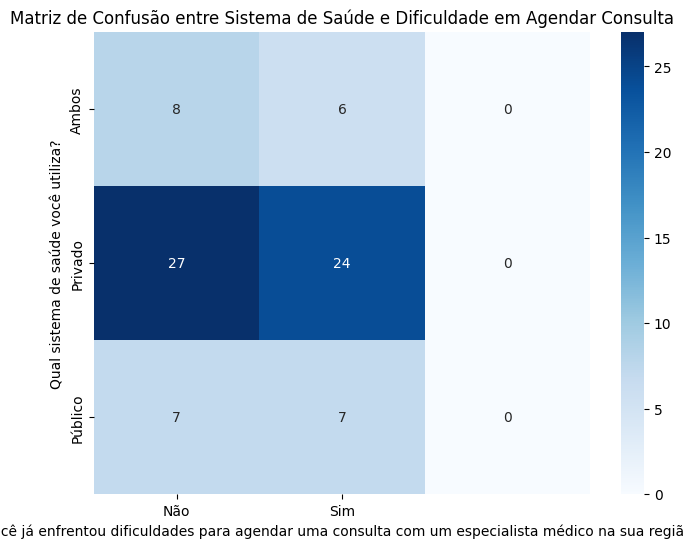

In [29]:
col1 = "Qual sistema de saúde você utiliza?"
col2 = "Você já enfrentou dificuldades para agendar uma consulta com um especialista médico na sua região?"

y_true = label_encoders[col1].transform(df_filtered[col1])
y_pred = label_encoders[col2].transform(df_filtered[col2])

conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoders[col2].classes_, yticklabels=label_encoders[col1].classes_)
plt.xlabel(col2)
plt.ylabel(col1)
plt.title('Matriz de Confusão entre Sistema de Saúde e Dificuldade em Agendar Consulta')
plt.show()
